=================================================

Milestone 1

Nama  : Heru Ramadhan

Batch : HCK - 018

Bertujuan untuk menganilisa penjualan perusahaan Adidas agar dapat menentukan bagaimana meningkatkan penjualan berdasarkan analisa product category, retailer dan state. data

Dashboard mengenai analysis ini dapat di akses di <a href='https://public.tableau.com/shared/P2BW7SR9K?:display_count=n&:origin=viz_share_link'>link berikut</a>

=================================================

# Milestone 1

## Identifikasi Masalah

### Latar Belakang

Sebagai Data Analyst, saya diberikan kesempatan untuk menganalisa penjualan yang bertujuan agar perusahan dapat menentukan arahan strategi penjualan. Dengan mempertimbangkan banyaknya lokasi penjualan produk dan jenis produk, klien ingin memaksimalkan perolehan profit diseluruh lokasi dengan meningkatkan category produk tertentu di lokasi tertentu. Dataset yang dipilih adalah "Adidas Sales Analysis" yang dapat diakses pada <a href='https://www.kaggle.com/datasets/vishwas199728/adidas-sales-data'>link berikut</a>

### Framework SMART

S: Meningkatkan penjualan produk kategori tertentu melalui retailer <br>
M: Mencapai unit terjual sama atau lebih dari 15% untuk beberapa kategori produk dalam 2 quarter <br>
A: Mengidentifikasi retailer di kota-kota yang telah menunjukkan penjualan tinggi dalam produk kategori tersebut<br>
R: Peningkatan penjualan produk pada retailer dan state akan berdampak pada pendapatan secara total<br> 
T: Peningkatan sales sebesar 15% dalam 2 quarter atau 6 bulan <br>

### Problem Statement

The objective of this assignment is to analyze the Adidas sales database and identify key insights to help improve sales performance and optimize business strategies. By examining the sales data, we aim to understand factors influencing sales, identify trends, and uncover opportunities for growth.

Tujuan assignment ini adalah untuk menganalisa adidas sales database dan mengidentifikasi product category dan retailer untuk meningkatkan nilai total sales lebih dari 15% dalam rentang waktu 6 bulan <br>

### Problem Breakdown

- Negara bagian apa yang memiliki nilai sales paling tinggi?<br>
- Pada bulan apa sales mencapai titik tertinggi?<br>
- Product category apa yang menjadi best seller setiap negara bagian?<br>
- Retailer apakah yang memiliki nilai sales tertinggi di setiap negara bagian?<br>
- Berapa banyak jumlah rata rata penjualan adidas setiap negara bagiannya?<br>
- Apakah ada perbedaan signifikan antara retailer dan jumlah sale? <br>

# Data Loading

In [538]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [781]:
# melakukan penambahan 'AdidasSalesdata.xlsx' kedalam sebuah dataframe
df = pd.read_excel('/Users/Heru/Downloads/AdidasSalesdata.xlsx')

# melihat isi dataframe
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Gender Type,Product Category,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2021-10-26,Northeast,Pennsylvania,Philadelphia,Men,Apparel,55,125,68750.0,24062.50,0.35,Outlet
1,Foot Locker,1185732,2021-10-27,Northeast,Pennsylvania,Philadelphia,Women,Apparel,45,225,101250.0,30375.00,0.30,Outlet
2,Foot Locker,1185732,2021-10-28,Northeast,Pennsylvania,Philadelphia,Men,Street Footwear,45,475,213750.0,117562.50,0.55,Outlet
3,Foot Locker,1185732,2021-10-29,Northeast,Pennsylvania,Philadelphia,Men,Athletic Footwear,45,125,56250.0,19687.50,0.35,Outlet
4,Foot Locker,1185732,2021-10-30,Northeast,Pennsylvania,Philadelphia,Women,Street Footwear,35,175,61250.0,24500.00,0.40,Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,West Gear,1128299,2020-03-14,West,Nevada,Las Vegas,Women,Apparel,56,170,9520.0,1713.60,0.18,Outlet
9644,West Gear,1128299,2020-03-15,West,Nevada,Las Vegas,Men,Street Footwear,20,149,2980.0,1192.00,0.40,Outlet
9645,West Gear,1128299,2020-03-16,West,Nevada,Las Vegas,Men,Athletic Footwear,31,145,4495.0,1123.75,0.25,Outlet
9646,West Gear,1128299,2020-03-17,West,Nevada,Las Vegas,Women,Street Footwear,26,128,3328.0,1397.76,0.42,Outlet


# Data Summary

In [782]:
# Melihat info dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Gender Type       9648 non-null   object        
 7   Product Category  9648 non-null   object        
 8   Price per Unit    9648 non-null   int64         
 9   Units Sold        9648 non-null   int64         
 10  Total Sales       9648 non-null   float64       
 11  Operating Profit  9648 non-null   float64       
 12  Operating Margin  9648 non-null   float64       
 13  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), fl

Setelah melakukan data loading, didapati data sebagai berikut:
- Data memiliki 14 kolom
- Data berjumlah 9648 baris
- Data tidak memiliki missing values
- Data memiliki 1 tipe datetime
- Data memiliki 3 tipe float64
- Data memiliki 3 tipe integer
- Data memiliki 7 tipe object

Database Adidas sales memiliki kolom berikut:
- Retailer: Mewakili toko atau bisnis yang menjual produk Adidas langsung kepada konsumen.
- Retailer ID: Identifikasi unik yang diberikan kepada setiap retailer dalam dataset
- Invoice Date: Catatan tanggal transaksi penjualan terjadi
- Region: Area geografis tertentu di mana aktivitas penjualan berlangsung
- State: Mewakili divisi administratif atau wilayah tertentu dalam suatu negara
- City: Mengacu pada area perkotaan atau kotamadya di mana aktivitas penjualan dilakukan
- Gender Type: Kategorisasi individu berdasarkan jenis kelamin.
- Product Category: Klasifikasi atau pengelompokan produk Adidas.
- Price per Unit: Biaya atau harga yang terkait dengan satu unit produk.
- Units Sold: Kuantitas atau jumlah unit dari suatu produk tertentu yang terjual selama transaksi penjualan tertentu.
- Total Sales: Pendapatan keseluruhan yang dihasilkan dari transaksi penjualan.
- Operating Profit: Laba yang diperoleh oleh retailer dari operasi bisnis.
- Operating Margin: Metode keuangan yang menunjukkan profitabilitas dan efisiensi operasi retailer.
- Sales Method: Pendekatan atau saluran yang digunakan oleh retailer untuk menjual produk atau jasanya

# Identifying Missing Value

In [783]:
# Melihat dan menjumlahkan missing values pada dataframe
df.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Gender Type         0
Product Category    0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

Data tidak memiliki missing values

# Data Duplicate Checking

In [784]:
# Melihat dan menjumlahkan duplikasi pada data
df.duplicated().sum()

0

Data tidak memiliki duplikasi 

# Data Cleaning

In [785]:
# Menghapus kolom yang tidak diperlukan
dropColumns = ['Operating Profit', 'Operating Margin']
df = df.drop(columns=dropColumns, axis=1)

df.head(10)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Gender Type,Product Category,Price per Unit,Units Sold,Total Sales,Sales Method
0,Foot Locker,1185732,2021-10-26,Northeast,Pennsylvania,Philadelphia,Men,Apparel,55,125,68750.0,Outlet
1,Foot Locker,1185732,2021-10-27,Northeast,Pennsylvania,Philadelphia,Women,Apparel,45,225,101250.0,Outlet
2,Foot Locker,1185732,2021-10-28,Northeast,Pennsylvania,Philadelphia,Men,Street Footwear,45,475,213750.0,Outlet
3,Foot Locker,1185732,2021-10-29,Northeast,Pennsylvania,Philadelphia,Men,Athletic Footwear,45,125,56250.0,Outlet
4,Foot Locker,1185732,2021-10-30,Northeast,Pennsylvania,Philadelphia,Women,Street Footwear,35,175,61250.0,Outlet
5,Foot Locker,1185732,2021-10-31,Northeast,Pennsylvania,Philadelphia,Women,Athletic Footwear,40,50,20000.0,Outlet
6,Foot Locker,1185732,2021-11-01,Northeast,Pennsylvania,Philadelphia,Men,Apparel,55,125,68750.0,Outlet
7,Foot Locker,1185732,2021-11-02,Northeast,Pennsylvania,Philadelphia,Women,Apparel,45,225,101250.0,Outlet
8,Foot Locker,1185732,2021-11-03,Northeast,Pennsylvania,Philadelphia,Men,Street Footwear,50,445,222500.0,Outlet
9,Foot Locker,1185732,2021-11-04,Northeast,Pennsylvania,Philadelphia,Men,Athletic Footwear,50,150,75000.0,Outlet


Karena data sudah bersih, maka tidak diperlukan untuk melakukan pembersihan selain menghapus kolom yang tidak digunakan, kolom yang tidak diguanakan antaranya adalah: <br>
- Operating Profit 
- Operating Margin

# Analysis 

### Central Tendecy

In [786]:
# Rata - rata
print('Rata-rata jumlah total sales:',df['Total Sales'].mean())

# Nilai tengah
print('Nilai tengah total sales:',df['Total Sales'].median())

# Nilai modus 
print('Modus total sales:',df['Total Sales'].mode().values[0])

Rata-rata jumlah total sales: 93273.4375
Nilai tengah total sales: 9576.0
Modus total sales: 100000.0


dari data tersebut dapat disimpulkan:<br>
- Rata-rata jumlah total sales: `93273.4375`
- Nilai tengah total sales: `9576.0`
- Modus total sales: `100000.0`

# Measurement of Dispersion

### Range

In [787]:
# Range
range = df['Total Sales'].max() - df['Total Sales'].min()
print('Range of total sales:',range)

Range of total sales: 825000.0


Rentang nilai total sales adalah `825000.0`

### Quartile

In [790]:
# Quartile
q1 = df['Total Sales'].quantile(0.25)
q2 = df['Total Sales'].quantile(0.5)
q3 = df['Total Sales'].quantile(0.75)

iqr = q3 - q1
print('Q1:',q1)
print('Q2:',q2)
print('Q3:',q3)
print('Interquartile Range (IQR):',iqr)

Q1: 4254.5
Q2: 9576.0
Q3: 150000.0
Interquartile Range (IQR): 145745.5


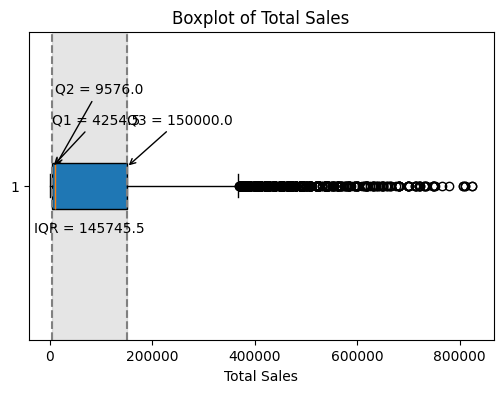

In [690]:
#@title Illustration of Quartile on Boxplot
plt.figure(figsize=(6, 4))
plt.boxplot(df['Total Sales'], vert=False, patch_artist=True)

plt.annotate(f'Q1 = {q1}', xy=(q1, 1.06), xytext=(q1, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q2 = {q2}', xy=(q2, 1.06), xytext=(q2, 1.3), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q3 = {q3}', xy=(q3, 1.06), xytext=(q3, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'IQR = {iqr}', xy=((q1+q3)/2, 0.85), ha='center')

plt.axvline(q1, linestyle='--', color='gray', label='Q1')
plt.axvline(q3, linestyle='--', color='gray', label='Q3')
plt.axvspan(q1, q3, alpha=0.2, color='gray', label='IQR')

plt.xlabel('Total Sales')
plt.title('Boxplot of Total Sales')

plt.show()

Berikut gambaran nilai Quartile data dari:
- Q1 = 4254.5
- Q2: 9576.0
- Q3: 150000.0
- Interquartile Range (IQR): 145745.5

### Variance

In [791]:
print('Variance total sales:',df['Total Sales'].var())

Variance total sales: 20140155803.6106


### Standard Deviation

In [792]:
print('Standard deviation total sales:',df['Total Sales'].std())

Standard deviation total sales: 141916.0167268325


dari data tersebut dapat disimpulkan:<br>
- Standard deviation total sales: `141916.0167268325`
- Variance total sales: `20140155803.6106`

### Normality Test

#### Shapiro-Wilk Test <br>
Ini merupakan test gabungan skewness dan kurtosis untuk memvalidasi distribusi data normal atau tidak.<br>

In [794]:
# Test normalitas data
res = stats.shapiro(df['Total Sales'])
print(f'p-value: {res.pvalue}')

p-value: 7.915827412415635e-85


Dengan nilai p-value kurang dari 0.05 maka distribusi data tidak normal

### Skewness and Kurtosis

In [795]:
# Skewness
print('Skewness total sales:',df['Total Sales'].skew())

# Kurtosis
print('Kurtosis total sales:',df['Total Sales'].kurtosis())

Skewness total sales: 1.841359166612018
Kurtosis total sales: 3.1438419253367886


dari data tersebut dapat disimpulkan:<br>
- Skewness total sales: `1.841359166612018`
- Kurtosis total sales: `3.1438419253367886`


Nilai skewness yang melebihi 0,05 menunjukkan bahwa distribusi data total sales condong ke kanan.<br>
Nilai kurtosis sebesar 3.14 menunjukkan bahwa distribusi data total sales memiliki nilai outliers.

# Outliers and Extreme Values Analysis

Berikut gambaran data total sales beserta outliers

<Axes: >

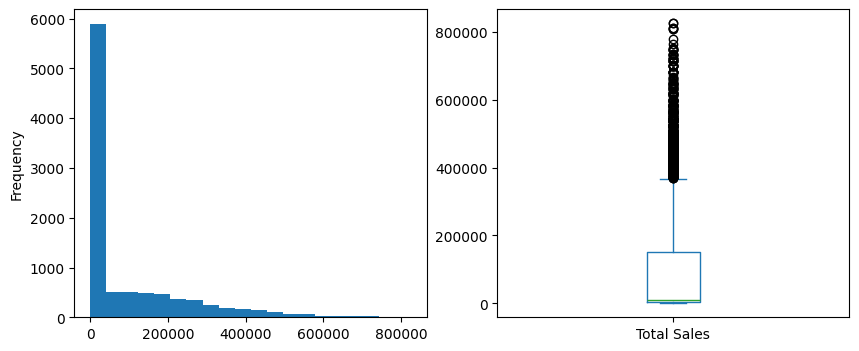

In [796]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

df['Total Sales'].plot(kind='hist',bins=20,ax=ax[0])
df['Total Sales'].plot(kind='box',ax=ax[1])

Berikut tampilan distribusi data dan outlier

### Skew Distribution: Tukey's Rule

In [797]:
q1 = df['Total Sales'].quantile(0.25)
q3 = df['Total Sales'].quantile(0.75)
iqr = q3-q1

# Batas atas dan batas bawah
up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

# Filter nilai outlier
outlier = df['Total Sales'][(df['Total Sales']<low_bound) | (df['Total Sales']>up_bound)]
no_outlier = df['Total Sales'][(df['Total Sales']>=low_bound) & (df['Total Sales']<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(df["Total Sales"]):.2f}%%')

Upper Boundary: 368618.25
Lower Boundary: -214363.75
Percentage of outliers: 6.77%%


Penggunaan Tukey Rule dikarenakan data tidak memiliki distribusi normal, berikut hasil perhitungan tukey rule: <br>
- Data total sales memiliki range diantara -214363.75 dan 368618.25
- Terdapat 6.77%% outlier pada data total sales

<Axes: >

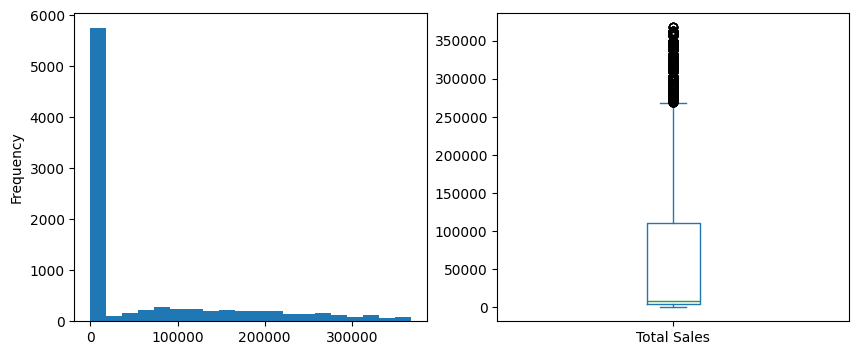

In [737]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

no_outlier.plot(kind='hist',bins=20,ax=ax[0])
no_outlier.plot(kind='box',ax=ax[1])

Berikut tampilan data sesudah dilakukannya pembersihan outlier, Pembersihan Outlier dibutuhkan agar dapat memenuhi syarat ANOVA test

In [798]:
# Menggantikan data dengan data yang sudah tidak punya outlier
df = df[(df['Total Sales']>=low_bound) & (df['Total Sales']<=up_bound)]
df = df.reset_index(drop=True)
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Gender Type,Product Category,Price per Unit,Units Sold,Total Sales,Sales Method
0,Foot Locker,1185732,2021-10-26,Northeast,Pennsylvania,Philadelphia,Men,Apparel,55,125,68750.0,Outlet
1,Foot Locker,1185732,2021-10-27,Northeast,Pennsylvania,Philadelphia,Women,Apparel,45,225,101250.0,Outlet
2,Foot Locker,1185732,2021-10-28,Northeast,Pennsylvania,Philadelphia,Men,Street Footwear,45,475,213750.0,Outlet
3,Foot Locker,1185732,2021-10-29,Northeast,Pennsylvania,Philadelphia,Men,Athletic Footwear,45,125,56250.0,Outlet
4,Foot Locker,1185732,2021-10-30,Northeast,Pennsylvania,Philadelphia,Women,Street Footwear,35,175,61250.0,Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...
8990,West Gear,1128299,2020-03-14,West,Nevada,Las Vegas,Women,Apparel,56,170,9520.0,Outlet
8991,West Gear,1128299,2020-03-15,West,Nevada,Las Vegas,Men,Street Footwear,20,149,2980.0,Outlet
8992,West Gear,1128299,2020-03-16,West,Nevada,Las Vegas,Men,Athletic Footwear,31,145,4495.0,Outlet
8993,West Gear,1128299,2020-03-17,West,Nevada,Las Vegas,Women,Street Footwear,26,128,3328.0,Outlet


Setelah mengganti data dengan data yang sudah tidak ada outlier, kini jumlah baris menjadi 8995 baris

### 1. Negara bagian apa yang memiliki nilai sales paling tinggi?

In [649]:
# Unique list kolom state
df['State'].unique()

array(['Pennsylvania', 'Rhode Island', 'New York', 'Delaware',
       'New Hampshire', 'Connecticut', 'West Virginia', 'Maryland',
       'Massachusetts', 'Maine', 'Vermont', 'New Jersey', 'Ohio',
       'Michigan', 'North Dakota', 'South Dakota', 'Missouri', 'Iowa',
       'Indiana', 'Wisconsin', 'Illinois', 'Minnesota', 'Nebraska',
       'Kansas', 'Virginia', 'Georgia', 'Florida', 'Kentucky',
       'North Carolina', 'South Carolina', 'Utah', 'Alaska', 'Wyoming',
       'California', 'Washington', 'Texas', 'Tennessee', 'Alabama',
       'Mississippi', 'Montana', 'Louisiana', 'Oklahoma', 'Arkansas',
       'Idaho', 'Hawaii', 'New Mexico', 'Arizona', 'Colorado', 'Oregon',
       'Nevada'], dtype=object)

In [799]:
# Melakukan groupby state berdasarkan jumlah total sales
topState = df.groupby('State')['Total Sales'].sum().sort_values(ascending=False).reset_index()

# Mengambil Top 5 dan Bottom 5 
topState = pd.concat([topState.head(5),topState.tail(5)])
topState


,State,Total Sales
0,Texas,25297246.0
1,California,20077883.0
2,Florida,17698714.0
3,New York,17147289.0
4,Georgia,16232466.0
45,North Dakota,7735580.0
46,Wisconsin,7727469.0
47,Iowa,7424011.0
48,Minnesota,7378068.0
49,Nebraska,5929038.0


Terdapat 5 states dengan jumlah total sales tertinggi, yang diantaranya adalah:
- Texas 
- California 
- Florida 
- New York 
- Georgia <br>

Dan states dengan jumlah total sales terendah adalah:
- North Dakota
- Wisconsin
- Iowa
- Minnesota
- Nebraska

Berikut tampilan bar chart mengenai States berdasarkan total penjualan

In [800]:
fig = px.bar(topState, x="Total Sales", y="State", orientation='h')
fig.show()

### 2. Pada bulan apa penjualan mencapai titik tertinggi?

In [801]:
# Melakukan filter untuk menunjukkan data pada tahun 2020
topMonth2020 = df[(df['Invoice Date'].dt.year == 2020)]
topMonth2020 = topMonth2020.sort_values(by='Invoice Date')
topMonth2020

,Retailer,Retailer ID,Invoice Date,Region,State,City,Gender Type,Product Category,Price per Unit,Units Sold,Total Sales,Sales Method
67,Foot Locker,1185732,2020-01-01,Northeast,Pennsylvania,Philadelphia,Women,Apparel,75,275,206250.0,Outlet
135,Foot Locker,1185732,2020-01-01,Northeast,Pennsylvania,Philadelphia,Women,Apparel,53,83,4399.0,Outlet
203,Foot Locker,1185732,2020-01-01,Northeast,Pennsylvania,Philadelphia,Women,Apparel,68,83,5644.0,Online
354,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men,Street Footwear,47,336,15792.0,Online
402,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men,Street Footwear,34,384,13056.0,Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...
5042,Kohl's,1189833,2020-12-30,Midwest,Minnesota,Minneapolis,Women,Street Footwear,41,119,4879.0,Online
5031,Kohl's,1189833,2020-12-31,Midwest,Minnesota,Minneapolis,Women,Athletic Footwear,45,325,146250.0,Outlet
8289,West Gear,1128299,2020-12-31,West,California,San Francisco,Men,Street Footwear,44,270,11880.0,Outlet
8210,West Gear,1128299,2020-12-31,West,California,San Francisco,Men,Street Footwear,56,252,14112.0,Online


Terdapat 1083 data penjualan selama tahun 2020

In [802]:
# Menambah kolom baru untuk mengidentifikasi bulan dengan berbentuk string
topMonth2020['Bulan'] = topMonth2020['Invoice Date'].dt.month.map({
    1: 'Januari',
    2: 'Februari',
    3: 'Maret',
    4: 'April',
    5: 'Mei',
    6: 'Juni',
    7: 'Juli',
    8: 'Agustus',
    9: 'September',
    10: 'Oktober',
    11: 'November',
    12: 'Desember'
})

# Membuat urutan bulan secara berurutan
urutanBulan = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 
               'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']

# Menambahkan urutan bulan sesuai urutan 
topMonth2020['Bulan'] = pd.Categorical(topMonth2020['Bulan'], categories=urutanBulan, ordered=True)

# Melakukan groupby bulan berdasarkan jumlah total sales
TopMonth2020 = topMonth2020.groupby('Bulan')['Total Sales'].sum().reset_index()

# Diurutkan berdasarkan bulan
TopMonth2020 = TopMonth2020.sort_values('Bulan')
TopMonth2020

/var/folders/yk/nt4l65gx6y11qv4p0t8p00wh0000gq/T/ipykernel_11660/1633204005.py:25: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Bulan,Total Sales
0,Januari,7427496.0
1,Februari,7125988.0
2,Maret,6208077.0
3,April,6492506.0
4,Mei,6983014.0
5,Juni,5407319.0
6,Juli,7826013.0
7,Agustus,9015230.0
8,September,4034436.0
9,Oktober,3587519.0


Berdasarkan data penjualan sepanjang tahun 2020, penjualan tertinggi terjadi pada bulan Agustus dan penjualan terendah terjadi pada bulan Oktober

In [803]:
fig = px.line(TopMonth2020, x='Bulan', y="Total Sales")
fig.show()

Line chart mengenai total sales sepanjang tahun 2020

In [804]:
# Melakukan filter untuk menunjukkan data pada tahun 2021
topMonth2021 = df[(df['Invoice Date'].dt.year == 2021)]
topMonth2021 = topMonth2021.sort_values(by='Invoice Date')
topMonth2021

,Retailer,Retailer ID,Invoice Date,Region,State,City,Gender Type,Product Category,Price per Unit,Units Sold,Total Sales,Sales Method
5247,Kohl's,1189833,2021-01-01,Midwest,Montana,Billings,Men,Apparel,47,77,3619.0,Online
8290,West Gear,1128299,2021-01-01,West,California,San Francisco,Men,Athletic Footwear,51,233,11883.0,Outlet
5179,Kohl's,1189833,2021-01-01,Midwest,Montana,Billings,Men,Apparel,50,275,137500.0,Outlet
8211,West Gear,1128299,2021-01-01,West,California,San Francisco,Men,Athletic Footwear,64,225,14400.0,Online
5180,Kohl's,1189833,2021-01-02,Midwest,Montana,Billings,Women,Apparel,45,475,213750.0,Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...
1031,Amazon,1185732,2021-12-31,Northeast,Maine,Portland,Men,Apparel,52,36,1872.0,Online
66,Foot Locker,1185732,2021-12-31,Northeast,Pennsylvania,Philadelphia,Men,Apparel,70,175,122500.0,Outlet
202,Foot Locker,1185732,2021-12-31,Northeast,Pennsylvania,Philadelphia,Men,Apparel,63,47,2961.0,Online
1099,Amazon,1185732,2021-12-31,Northeast,Maine,Portland,Men,Apparel,55,125,68750.0,Outlet


Terdapat 7912 data penjualan selama tahun 2020

In [805]:
# Menambah kolom baru untuk mengidentifikasi bulan dengan berbentuk string
topMonth2021['Bulan'] = topMonth2021['Invoice Date'].dt.month.map({
    1: 'Januari',
    2: 'Februari',
    3: 'Maret',
    4: 'April',
    5: 'Mei',
    6: 'Juni',
    7: 'Juli',
    8: 'Agustus',
    9: 'September',
    10: 'Oktober',
    11: 'November',
    12: 'Desember'
})

# Membuat urutan bulan secara berurutan
urutanBulan = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 
               'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']

# Menambahkan urutan bulan sesuai urutan 
topMonth2021['Bulan'] = pd.Categorical(topMonth2021['Bulan'], categories=urutanBulan, ordered=True)

# Melakukan groupby bulan berdasarkan jumlah total sales
TopMonth2021 = topMonth2021.groupby('Bulan')['Total Sales'].sum().reset_index()

# Diurutkan berdasarkan bulan
TopMonth2021 = TopMonth2021.sort_values('Bulan')
TopMonth2021

/var/folders/yk/nt4l65gx6y11qv4p0t8p00wh0000gq/T/ipykernel_11660/3412808485.py:25: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Bulan,Total Sales
0,Januari,38717896.0
1,Februari,37854665.0
2,Maret,38757032.0
3,April,39909214.0
4,Mei,47723681.0
5,Juni,40417553.0
6,Juli,41123431.0
7,Agustus,47095721.0
8,September,44730773.0
9,Oktober,44061014.0


Berdasarkan data penjualan sepanjang tahun 2021, penjualan tertinggi terjadi pada bulan Mei dan penjualan terendah terjadi pada bulan Februari

In [806]:
fig = px.line(TopMonth2021, x='Bulan', y="Total Sales")
fig.show()

Line chart mengenai total sales sepanjang tahun 2021

### 3. Product category apa yang menjadi best seller di setiap negara bagian?

In [807]:
# Unique list kolom Product Category
df['Product Category'].unique()

array(['Apparel', 'Street Footwear', 'Athletic Footwear'], dtype=object)

In [808]:
topCategoryGroup = df.groupby(['State', 'Product Category'])['Total Sales'].sum().sort_values(ascending=False).reset_index()
topCategory = topCategoryGroup[['State', 'Product Category','Total Sales']].groupby('Total Sales').sum().sort_index(ascending=False).reset_index()
topCategory

,Total Sales,State,Product Category
0,9310833.0,Texas,Athletic Footwear
1,9229723.0,Texas,Apparel
2,7115670.0,Florida,Athletic Footwear
3,7064013.0,California,Athletic Footwear
4,7056433.0,New York,Athletic Footwear
...,...,...,...
145,1769491.0,Minnesota,Athletic Footwear
146,1763596.0,North Dakota,Athletic Footwear
147,1732858.0,Nebraska,Apparel
148,1678491.0,Iowa,Athletic Footwear


Data diatas merupakan data top 3 product category berdasarkan sales disetiap states

In [809]:
topCategory = topCategory.groupby('State').head(1)
topCategory = topCategory.sort_values(by='Total Sales')
topCategory = topCategory.sort_index(ascending=True)
topCategory

,Total Sales,State,Product Category
0,9310833.0,Texas,Athletic Footwear
2,7115670.0,Florida,Athletic Footwear
3,7064013.0,California,Athletic Footwear
4,7056433.0,New York,Athletic Footwear
9,5893236.0,Wyoming,Apparel
10,5806725.0,Nevada,Street Footwear
11,5785346.0,Arizona,Street Footwear
12,5614023.0,Georgia,Apparel
13,5507570.0,Montana,Street Footwear
15,5445493.0,New Hampshire,Apparel


Data diatas merupakan data Top 1 dari setiap Product Category di setiap states, yang dapat disimpulkan bahwa:
- Texas memiliki total penjualan paling banyak pada produk Athletic Footwear
- Wyoming memiliki total penjualan paling banyak pada produk Apparel
- Nevada memiliki total penjualan paling banyak pada produk Street Footwear
- Produk kategori Street Footwear menjadi top selling di 27 states

Berikut tampilan bar chat mengenai Product Category berdasarkan total penjualan

In [810]:
fig = px.bar(topCategory, x='State', y='Total Sales',
              color='Product Category',
             labels={'pop':'population of Canada'}, height=400)
fig.show()

### 4. Retailer apakah yang memiliki nilai sales tertinggi di setiap negara bagian?

In [811]:
df['Retailer'].unique()

array(['Foot Locker', 'Amazon', 'Sports Direct', 'West Gear', "Kohl's",
       'Walmart'], dtype=object)

In [812]:
topRetailerGroup = df.groupby(['State', 'Retailer'])['Total Sales'].sum().sort_values(ascending=False).reset_index()
topRetailer = topRetailerGroup[['State', 'Retailer','Total Sales']].groupby('Total Sales').sum().sort_index(ascending=False).reset_index()
topRetailer = topRetailer.groupby('State').head(1)
topRetailer = topRetailer.sort_values(by='Total Sales')
topRetailer = topRetailer.sort_index(ascending=True)
topRetailer

,Total Sales,State,Retailer
0,16416352.0,Texas,Sports Direct
1,15826009.0,Nevada,West Gear
2,15018998.0,Montana,Kohl's
3,14319733.0,California,Kohl's
4,13155216.0,Arizona,Foot Locker
5,12960965.0,New Mexico,Kohl's
6,12872498.0,Georgia,Sports Direct
7,12764036.0,Colorado,West Gear
8,12212465.0,Tennessee,Sports Direct
9,12170662.0,Wyoming,Kohl's


In [813]:
fig = px.bar(topRetailer, x='State', y='Total Sales',
              color='Retailer',
             labels={'pop':'population of Canada'}, height=400)
fig.show()

Dari kategori retailer dapat diketahui:
- Sports Direct memiliki total sales tertinggi di Texas
- West Gear memiliki total sales tertinggi di Nevada
- Kolh memiliki total sales tertinggi di Montana
- Foot Locker memiliki total sales tertinggi di Arizona
- Amazon memiliki total sales tertinggi di Vermont
- Walmart memiliki total sales tertinggi di Florida

Berdasarkan data tersebut dapat dikatakan bahwa customer pada setiap negara bagian memiliki preferensi retailer yang berbeda, yang mengakibatkan beberapa retailer lebih unggul dibanding retailer yg lainnya.

### 5. Berapa banyak jumlah rata rata penjualan adidas setiap negara bagiannya?

In [814]:
avgState = df.groupby('State')['Total Sales'].mean().sort_values(ascending=False).reset_index()
avgState.columns = ['State', 'Average']
avgState

,State,Average
0,Montana,109103.375000
1,Wyoming,107798.634328
2,Michigan,105115.171642
3,Colorado,102112.288000
4,South Carolina,98929.509259
5,Washington,96831.575221
6,Hawaii,96483.390244
7,North Carolina,93280.179487
8,Alaska,90998.942446
9,Ohio,87555.335938


Data diatas menunjukan rata rata penjualan disetiap statenya, dimana:<br>
- Montana memiliki rata rata penjualan tertinggi dengan nilai rata rata 109103.375000
- Rhode Island memiliki rata rata penjualan terendah dengan nilai rata rata 39105.583333
- Negara bagian seperti Montana, Wyoming, dan Michigan memiliki rata rata penjualan yang sangat tinggi dibandingkan dengan negara bagian lainnya. Ini menunjukkan pasar yang kuat atau strategi penjualan yang berhasil di negara bagian tersebut tersebut.
- Negara bagian seperti Rhode Island, Nebraska, dan Oklahoma memiliki rata rata penjualan yang relatif rendah. Ini menunjukkan potensi area untuk melakukan peningkatan dan peluang bagi strategi penjualan yang lebih agresif.

Maka berdasarkan data tersebut dapat dikatakan bahwa terdapat perbedaan dalam nilai yang diberikan untuk masing-masing negara bagian.
<br>
<br>
Berikut gambaran bar chart nilai rata rata penjualan setiap negara bagian:

In [815]:
fig = px.bar(avgState, x='State', y='Average',
             color='Average',
             labels={'pop':'population of Canada'}, height=400)
fig.show()

rata rata total penjualan yang tinggi dapat dilihat dengan warna barchart yang lebih terang dan rata rata total penjualan yang rendah dapat dilihat dengan warna gelap

### 6. Apakah ada perbedaan signifikan antara jumlah sale dan retailer?

Melakukan analisis tentang perbedaan signifikan antara jumlah sale dan retailer bertujuan unutk mencari tau apakah adanya perbedaan total sales diantara para retailer

### Hypothesis Test

#### Anova <br>
Menggunakan anova test dikarenakan sampel group lebih dari dua

In [755]:
# List Retailer
df['Retailer'].unique()

array(['Foot Locker', 'Amazon', 'Sports Direct', 'West Gear', "Kohl's",
       'Walmart'], dtype=object)

In [816]:
footLocker = df['Total Sales'][df['Retailer']=='Foot Locker']
amazon = df['Total Sales'][df['Retailer']=='Amazon']
sportsDirect = df['Total Sales'][df['Retailer']=='Sports Direct']
westGear = df['Total Sales'][df['Retailer']=='West Gear']
kohl = df['Total Sales'][df['Retailer']=="Kohl's"]
walmart = df['Total Sales'][df['Retailer']=='Walmart']

print(f'Average Total Sales of Foot Locker: {footLocker.mean():.2f}')
print(f'Average Total Sales of Amazon: {amazon.mean():.2f}')
print(f'Average Total Sales of Sports Direct: {sportsDirect.mean():.2f}')
print(f'Average Total Sales of West Gear: {westGear.mean():.2f}')
print(f'Average Total Sales of Kohls: {kohl.mean():.2f}')
print(f'Average Total Sales of Walmart: {walmart.mean():.2f}')

Average Total Sales of Foot Locker: 59121.03
Average Total Sales of Amazon: 69709.05
Average Total Sales of Sports Direct: 66828.62
Average Total Sales of West Gear: 62495.74
Average Total Sales of Kohls: 81409.84
Average Total Sales of Walmart: 59338.07


Berikut nilai rata rata penjualan di setiap retailer: <br>
- Rata-rata penjualan toko retailer Foot Locker: 59121.03
- Rata-rata penjualan toko retailer Amazon: 69709.05
- Rata-rata penjualan toko retailer Sports Direct: 66828.62
- Rata-rata penjualan toko retailer West Gear: 62495.74
- Rata-rata penjualan toko retailer Kohls: 81409.84
- Rata-rata penjualan toko retailer Walmart: 59338.07

H0: Tidak ada perbedaan yang signifikan diantara jumlah total sale dan retailer <br>

H1: Adanya perbedaan yang signifikan diantara jumlah total sales dan retailer <br>

In [817]:
# Pengujian p-value menggunakan Anova test
res = stats.f_oneway(footLocker, amazon, sportsDirect, westGear, kohl, walmart)
print('P-value:',res.pvalue)

P-value: 1.818960237210416e-08



Nilai p-value kurang dari 0.05, sehingga H0 ditolak yang artinya adanya perbedaan signifikan total sales diantara retailer

# Kesimpulan

Berdasarkan hasil data analysis diatas, dapat disimpulkan bahwa: <br>
- Terdapat 5 states dengan jumlah total sales tertinggi, yang diantaranya adalah:
    - Texas 
    - California 
    - Florida 
    - New York 
    - Georgia 
- Dan states dengan jumlah total sales terendah adalah:
    - North Dakota
    - Wisconsin
    - Iowa
    - Minnesota
    - Nebraska
- Penjualan tertinggi terjadi pada bulan mei 2021
- Penjualan terendah terjadi pada oktober 2020
- Produk kategori Street Footwear menjadi top selling di 27 states
- Sports Direct memiliki total sales tertinggi di Texas
- West Gear memiliki total sales tertinggi di Nevada
- Kolh memiliki total sales tertinggi di Montana
- Foot Locker memiliki total sales tertinggi di Arizona
- Amazon memiliki total sales tertinggi di Vermont
- Walmart memiliki total sales tertinggi di Florida
- Montana memiliki rata rata penjualan tertinggi dengan nilai rata rata 109103.375000
- Rhode Island memiliki rata rata penjualan terendah dengan nilai rata rata 39105.583333
- Ada perbedaan yang signifikan antara jumlah total penjualan (total sales) dan retailer. Ini membuktikan adany perbedaan yang signifikan di antara retailer. Perusahaan Adidas harus mempertimbangkan perbedaan ini dalam menjalankan strategi penjualan  untuk memaksimalkan jumlah penjualan dari retailer yang berbeda.

# Rekomendasi

Berdasarkan analysis yang sudah dilakukan, klien dapat meningkatkan penjualan dengan hal berikut: <br>
- Meningkatkan produksi dan penjualan produk kategory tertentu di beberapa states yang memiliki nilai tota sales rendah
- Melakukan promosi bersama retailer yang memiliki top sales tertinggi di setiap statesnya
- Meningkatkan produksi product bercategory yang menjadi best seller setiap retailer dan states
- Melakukan promosi pada awal tahun

In [678]:
df.to_csv('AdidasCleaned.csv')

# Dashboard

### Dashboard mengenai analysis ini dapat di akses di <a href='https://public.tableau.com/shared/P2BW7SR9K?:display_count=n&:origin=viz_share_link'>link berikut</a>